## **Conjunto de implementação Fuzzy**

### Bibliotecas

In [50]:
import numpy as np
from skfuzzy import control as ctrl, defuzz
import skfuzzy as fuzz
import matplotlib.pyplot as plt

### Estados iniciais

In [51]:
#Definição dos parâmetros para construir o controlador Fuzzy

x = np.linspace(-1, 1, 1000)
x_p = np.linspace(-75, 75, 2000)
theta = np.linspace(-1, 1, 1000)
theta_p = np.linspace(-20, 20, 1000)

forca = np.linspace(-1000, 1000, 1000)

X = ctrl.Antecedent(x, 'Posição')
X_P = ctrl.Antecedent(x_p, 'Velocidade')
THETA = ctrl.Antecedent(theta, 'Angulo')
THETA_P = ctrl.Antecedent(theta_p, 'Velocidade Angular')

FORCA = ctrl.Consequent(forca, 'Força', defuzzify_method='centroid')
#defuzzify_method = 'centroid'
#defuzzify_method = 'bisector'
#defuzzify_method = 'mom'
#defuzzify_method = 'som'
#defuzzify_method = 'lom'

### Funções de pertinência

#### X

c:\Users\vinic\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


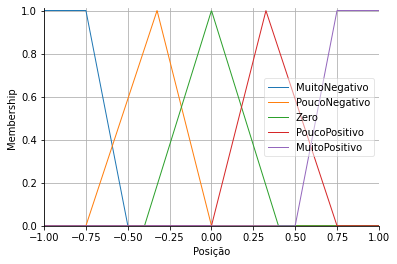

In [52]:
X['MuitoNegativo'] = fuzz.trapmf(x, [-1, -1, -0.75,  -0.5])
X['PoucoNegativo'] = fuzz.trimf( x, [-0.75, -0.325, -0])
X['Zero']          = fuzz.trimf( x, [-0.4, 0.0, 0.4])
X['PoucoPositivo'] = fuzz.trimf( x, [0, 0.325, 0.75])
X['MuitoPositivo'] = fuzz.trapmf(x, [0.5, 0.75, 1, 1])

X.view()
plt.grid()

#### X_P

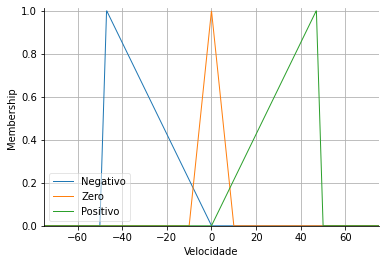

In [53]:
X_P['Negativo'] = fuzz.trimf(x_p, [-50, -47, -0])
X_P['Zero']     = fuzz.trimf(x_p, [-10, 0, 10])
X_P['Positivo'] = fuzz.trimf(x_p, [0, 47, 50])

X_P.view()
plt.grid()

#### THETA

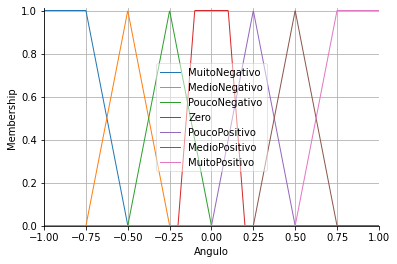

In [54]:
THETA['MuitoNegativo'] = fuzz.trapmf(theta, [-1, -1, -0.75, -0.5])
THETA['MedioNegativo'] = fuzz.trimf( theta, [-0.75, -0.5, -0.25])
THETA['PoucoNegativo'] = fuzz.trimf( theta, [-0.50, -0.25, 0])
THETA['Zero']          = fuzz.trapmf(theta, [-0.2, -0.1, 0.1, 0.2])
THETA['PoucoPositivo'] = fuzz.trimf( theta, [0 , 0.25, 0.5])
THETA['MedioPositivo'] = fuzz.trimf( theta, [0.25, 0.5, 0.75])
THETA['MuitoPositivo'] = fuzz.trapmf(theta, [0.5, 0.75, 1, 1])

THETA.view()
plt.grid()

#### THETA_P

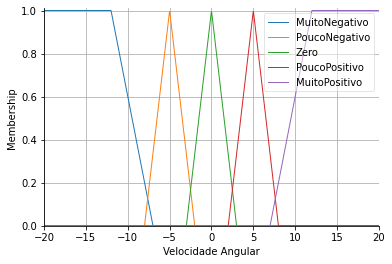

In [55]:
THETA_P['MuitoNegativo'] = fuzz.trapmf(theta_p, [-20,-20,-12,-7])
THETA_P['PoucoNegativo'] = fuzz.trimf( theta_p, [-8,-5,-2])
THETA_P['Zero']          = fuzz.trimf( theta_p, [-3, 0, 3])
THETA_P['PoucoPositivo'] = fuzz.trimf( theta_p, [2, 5, 8])
THETA_P['MuitoPositivo'] = fuzz.trapmf(theta_p, [7,12,20,20])

THETA_P.view()
plt.grid()

#### FORCA

##### Combinação simples

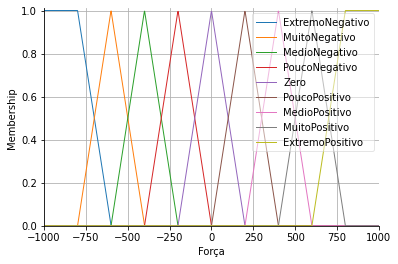

In [56]:
FORCA['ExtremoNegativo'] = fuzz.trapmf(forca, [-1000, -1000, -800, -600])
FORCA['MuitoNegativo']   = fuzz.trimf( forca, [-800, -600, -400])
FORCA['MedioNegativo']   = fuzz.trimf( forca, [-600, -400, -200])
FORCA['PoucoNegativo']   = fuzz.trimf( forca, [-400, -200, 0])
FORCA['Zero']            = fuzz.trimf( forca, [-200, 0, 200])
FORCA['PoucoPositivo']   = fuzz.trimf( forca, [0, 200, 400])
FORCA['MedioPositivo']   = fuzz.trimf( forca, [200, 400, 600])
FORCA['MuitoPositivo']   = fuzz.trimf( forca, [400, 600, 800])
FORCA['ExtremoPositivo'] = fuzz.trapmf(forca, [600, 800, 1000, 1000])

FORCA.view()
plt.grid()

##### Tentativa com equilíbrio de +/-

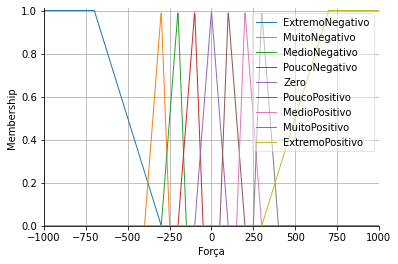

In [57]:
FORCA['ExtremoNegativo'] = fuzz.trapmf(forca, [-1000, -1000, -700, -300])
FORCA['MuitoNegativo']   = fuzz.trimf( forca, [-400, -300, -250])
FORCA['MedioNegativo']   = fuzz.trimf( forca, [-300, -200, -150])
FORCA['PoucoNegativo']   = fuzz.trimf( forca, [-200, -100, -50])
FORCA['Zero']            = fuzz.trimf( forca, [-100, 0, 100])
FORCA['PoucoPositivo']   = fuzz.trimf( forca, [50, 100, 200])
FORCA['MedioPositivo']   = fuzz.trimf( forca, [150, 200, 300])
FORCA['MuitoPositivo']   = fuzz.trimf( forca, [250, 300, 400])
FORCA['ExtremoPositivo'] = fuzz.trapmf(forca, [300, 700, 1000, 1000])

FORCA.view()
plt.grid()

### Regras

In [59]:
#REGRAS X/X_P
#Para as interpretações de posição a ação de controle é inversa à variação (erro)

RegraX_1 = ctrl.Rule( X['MuitoNegativo']     & X_P['Negativo'], FORCA['ExtremoPositivo'])
RegraX_2 = ctrl.Rule( X['PoucoNegativo']     & X_P['Negativo'], FORCA['MuitoPositivo'])
RegraX_3 = ctrl.Rule( X['Zero']              & X_P['Negativo'], FORCA['MedioPositivo'])
RegraX_4 = ctrl.Rule( X['Zero']              & X_P['Zero']    , FORCA['Zero'])
RegraX_5 = ctrl.Rule( X['Zero']              & X_P['Positivo'], FORCA['MedioNegativo'])
RegraX_6 = ctrl.Rule( X['PoucoPositivo']     & X_P['Positivo'], FORCA['MuitoNegativo'])
RegraX_7 = ctrl.Rule( X['MuitoPositivo']     & X_P['Positivo'], FORCA['ExtremoNegativo'])

#REGRAS THETA/THETA_P
RegraT_1 = ctrl.Rule( THETA['MuitoNegativo'] & THETA_P['MuitoNegativo'], FORCA['ExtremoNegativo'])
RegraT_2 = ctrl.Rule( THETA['MuitoNegativo'] & THETA_P['PoucoNegativo'], FORCA['ExtremoNegativo'])
RegraT_3 = ctrl.Rule( THETA['MuitoNegativo'] & THETA_P['Zero']         , FORCA['ExtremoNegativo'])
RegraT_4 = ctrl.Rule( THETA['MuitoNegativo'] & THETA_P['PoucoPositivo'], FORCA['ExtremoNegativo'])
RegraT_5 = ctrl.Rule( THETA['MuitoNegativo'] & THETA_P['MuitoPositivo'], FORCA['ExtremoNegativo'])

RegraT_6 = ctrl.Rule( THETA['MedioNegativo'] & THETA_P['MuitoNegativo'], FORCA['ExtremoNegativo'])
RegraT_7 = ctrl.Rule( THETA['MedioNegativo'] & THETA_P['PoucoNegativo'], FORCA['MuitoNegativo'])
RegraT_8 = ctrl.Rule( THETA['MedioNegativo'] & THETA_P['Zero']         , FORCA['MedioNegativo'])
RegraT_9 = ctrl.Rule( THETA['MedioNegativo'] & THETA_P['PoucoPositivo'], FORCA['PoucoNegativo'])
RegraT_10 = ctrl.Rule(THETA['MedioNegativo'] & THETA_P['MuitoPositivo'], FORCA['Zero'])

RegraT_11 = ctrl.Rule(THETA['PoucoNegativo'] & THETA_P['MuitoNegativo'], FORCA['MuitoNegativo'])
RegraT_12 = ctrl.Rule(THETA['PoucoNegativo'] & THETA_P['PoucoNegativo'], FORCA['MedioNegativo'])
RegraT_13 = ctrl.Rule(THETA['PoucoNegativo'] & THETA_P['Zero']         , FORCA['PoucoNegativo'])
RegraT_14 = ctrl.Rule(THETA['PoucoNegativo'] & THETA_P['PoucoPositivo'], FORCA['Zero'])
RegraT_15 = ctrl.Rule(THETA['PoucoNegativo'] & THETA_P['MuitoPositivo'], FORCA['PoucoPositivo'])

RegraT_16 = ctrl.Rule(THETA['Zero']          & THETA_P['MuitoNegativo'], FORCA['MedioNegativo'])
RegraT_17 = ctrl.Rule(THETA['Zero']          & THETA_P['PoucoNegativo'], FORCA['PoucoNegativo'])
RegraT_18 = ctrl.Rule(THETA['Zero']          & THETA_P['Zero']         , FORCA['Zero'])
RegraT_19 = ctrl.Rule(THETA['Zero']          & THETA_P['PoucoPositivo'], FORCA['PoucoPositivo'])
RegraT_20 = ctrl.Rule(THETA['Zero']          & THETA_P['MuitoPositivo'], FORCA['MedioPositivo'])

RegraT_21 = ctrl.Rule(THETA['PoucoPositivo'] & THETA_P['MuitoNegativo'], FORCA['PoucoNegativo'])
RegraT_22 = ctrl.Rule(THETA['PoucoPositivo'] & THETA_P['PoucoNegativo'], FORCA['Zero'])
RegraT_23 = ctrl.Rule(THETA['PoucoPositivo'] & THETA_P['Zero']         , FORCA['PoucoPositivo'])
RegraT_24 = ctrl.Rule(THETA['PoucoPositivo'] & THETA_P['PoucoPositivo'], FORCA['MedioPositivo'])
RegraT_25 = ctrl.Rule(THETA['PoucoPositivo'] & THETA_P['MuitoPositivo'], FORCA['MuitoPositivo'])

RegraT_26 = ctrl.Rule(THETA['MedioPositivo'] & THETA_P['MuitoNegativo'], FORCA['Zero'])
RegraT_27 = ctrl.Rule(THETA['MedioPositivo'] & THETA_P['PoucoNegativo'], FORCA['PoucoPositivo'])
RegraT_28 = ctrl.Rule(THETA['MedioPositivo'] & THETA_P['Zero']         , FORCA['MedioPositivo'])
RegraT_29 = ctrl.Rule(THETA['MedioPositivo'] & THETA_P['PoucoPositivo'], FORCA['MuitoPositivo'])
RegraT_30 = ctrl.Rule(THETA['MedioPositivo'] & THETA_P['MuitoPositivo'], FORCA['ExtremoPositivo'])

RegraT_31 = ctrl.Rule(THETA['MuitoPositivo'] & THETA_P['MuitoNegativo'], FORCA['PoucoPositivo'])
RegraT_32 = ctrl.Rule(THETA['MuitoPositivo'] & THETA_P['PoucoNegativo'], FORCA['MedioPositivo'])
RegraT_33 = ctrl.Rule(THETA['MuitoPositivo'] & THETA_P['Zero']         , FORCA['MuitoPositivo'])
RegraT_34 = ctrl.Rule(THETA['MuitoPositivo'] & THETA_P['PoucoPositivo'], FORCA['ExtremoPositivo'])
RegraT_35 = ctrl.Rule(THETA['MuitoPositivo'] & THETA_P['MuitoPositivo'], FORCA['ExtremoPositivo'])

compilado_regras = ctrl.ControlSystem([
    RegraX_1, RegraT_1,
    RegraX_2, RegraT_2,
    RegraX_3, RegraT_3,
    RegraX_4, RegraT_4,
    RegraX_5, RegraT_5,
    RegraX_6, RegraT_6,
    RegraX_7, RegraT_7,
              RegraT_8,
              RegraT_9,
              RegraT_10,
              RegraT_11,
              RegraT_12,
              RegraT_13,
              RegraT_14,
              RegraT_15,
              RegraT_16,
              RegraT_17,
              RegraT_18,
              RegraT_19,
              RegraT_20,
              RegraT_21,
              RegraT_22,
              RegraT_23,
              RegraT_24,
              RegraT_25,
              RegraT_26,
              RegraT_27,
              RegraT_28,
              RegraT_29,
              RegraT_30,
              RegraT_31,
              RegraT_32,
              RegraT_33,
              RegraT_34,
              RegraT_35])

Controle = ctrl.ControlSystemSimulation(compilado_regras)